In [2]:
%load_ext autoreload
%autoreload 2

import sys
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt

root_dir = Path.cwd().parent
sys.path.insert(0,str(root_dir))

# from placefield_dynamics.cluster_analysis import cluster_analysis
from placefield_dynamics.cluster_analysis_plots import cluster_analysis_plots

2025-01-05 23:08:39.219485: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-05 23:08:39.308082: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


/home/wollex/Documents/Science/WolfGroup/PlaceFields/Programs/PC_analysis/placefield_dynamics/placefield_detection


In [3]:
path_data = Path("../../data")

mouse = "579ad"
suffix = "_redetected"


def get_all_paths(paths_session, paths):
    paths = [
        (list(filter(lambda path: path.is_relative_to(session), paths)) or [None])[0]
        for session in paths_session
    ]
    return paths


path_mouse = path_data / mouse

path_matching = path_mouse / "matching" / f"neuron_registration{suffix}.pkl"

paths_session = sorted(path_mouse.glob("Session*"))

paths_behavior = sorted(path_mouse.glob(f"Session*/aligned_behavior.pkl"))
paths_place_field_detection = sorted(
    path_mouse.glob(f"Session*/placefield_detection*{suffix}.hdf5")
)
# paths_place_field_detection = [path for ]
paths_neuron_detection = sorted(path_mouse.glob(f"Session*/results*{suffix}.hdf5"))

paths_behavior = get_all_paths(paths_session, paths_behavior)
paths_place_field_detection = get_all_paths(paths_session, paths_place_field_detection)
paths_neuron_detection = get_all_paths(paths_session, paths_neuron_detection)

c = cluster_analysis_plots(
    path_mouse,
    path_matching,
    paths_behavior,
    paths_place_field_detection,
    paths_neuron_detection,
)

In [23]:
c.run_complete()
c.setup_plots()
# c.get_matching()
# c.get_behavior()
# c.get_stats()
# c.get_PC_fields()
# print(c.thr['A_rate'])
# c.update_status(A_thr=0,A0_thr=0,reliability_thr=0.2,sigma_thr=.5,fr_thr=0.01)
# c.calculate_field_firingrates()
# c.compareSessions()
# c.stability = c.calculate_placefield_stability(
# 	dsMax=c.data["nSes"], n_processes=8, N_bs=1000
# )
# c.save()

../../data/579ad/matching/match_model_redetected.pkl
found proper fit @times=0
../../data/579ad/matching/neuron_registration_redetected.pkl


Fields obtained and saved, time spend: 0.5187
update fields


/home/wollex/Documents/Science/WolfGroup/PlaceFields/Programs/PC_analysis/placefield_dynamics/placefield_detection
/home/wollex/Documents/Science/WolfGroup/PlaceFields/Programs/PC_analysis/placefield_dynamics/placefield_detection
/home/wollex/Documents/Science/WolfGroup/PlaceFields/Programs/PC_analysis/placefield_dynamics/placefield_detection
/home/wollex/Documents/Science/WolfGroup/PlaceFields/Programs/PC_analysis/placefield_dynamics/placefield_detection
/home/wollex/Documents/Science/WolfGroup/PlaceFields/Programs/PC_analysis/placefield_dynamics/placefield_detection
/home/wollex/Documents/Science/WolfGroup/PlaceFields/Programs/PC_analysis/placefield_dynamics/placefield_detection
/home/wollex/Documents/Science/WolfGroup/PlaceFields/Programs/PC_analysis/placefield_dynamics/placefield_detection
/home/wollex/Documents/Science/WolfGroup/PlaceFields/Programs/PC_analysis/placefield_dynamics/placefield_detection
/home/wollex/Documents/Science/WolfGroup/PlaceFields/Programs/PC_analysis/placef

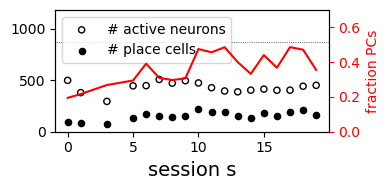

In [9]:
c.plot_matching_results()

In [5]:
# c.status['activity'][c.status["clusters"],...].sum(axis=0)
# c.update_status()
c.status["activity"].sum(axis=0)

# c.status['clusters'].sum()

array([[590, 498,  97,   0,   0,   0],
       [433, 379,  82,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0],
       [324, 294,  79,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0],
       [574, 445, 131,   0,   0,   0],
       [562, 447, 175,   0,   0,   0],
       [611, 507, 157,   0,   0,   0],
       [565, 471, 140,   0,   0,   0],
       [596, 495, 152,   0,   0,   0],
       [561, 473, 225,   0,   0,   0],
       [538, 427, 195,   0,   0,   0],
       [499, 395, 192,   0,   0,   0],
       [496, 387, 155,   0,   0,   0],
       [542, 403, 134,   0,   0,   0],
       [594, 413, 182,   0,   0,   0],
       [554, 402, 148,   0,   0,   0],
       [562, 403, 196,   0,   0,   0],
       [547, 441, 208,   0,   0,   0],
       [602, 450, 160,   0,   0,   0]])

491


'\n\t[ ] fix: stability plot\n    [ ] fix: which neurons are considered to be active? fitness? SNR? firingrate? which threshold? which combination?\n'

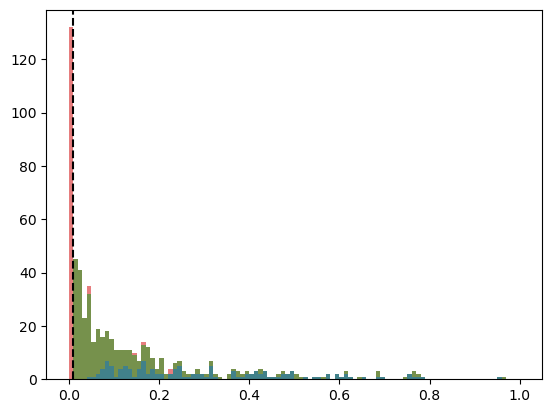

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)
s = 5
ax.hist(
    c.stats["firingrate"][:, s], bins=np.linspace(0, 1, 101), alpha=0.6, color="tab:red"
)
ax.hist(
    c.stats["firingrate"][c.status["activity"][:, s, 1], s],
    bins=np.linspace(0, 1, 101),
    alpha=0.6,
    color="tab:green",
)
ax.hist(
    c.stats["firingrate"][c.status["activity"][:, s, 2], s],
    bins=np.linspace(0, 1, 101),
    alpha=0.6,
    color="tab:blue",
)
ax.axvline(0.01, color="k", linestyle="--")

print(c.status["activity"][:, 0, 1].sum())

"""
	[x] fix: stability plot
    [ ] fix: which neurons are considered to be active? fitness? SNR? firingrate? which threshold? which combination?
"""

(array([[ 0.,  0.,  0.,  1.,  2.,  1.,  4.,  6.,  8., 11.,  8.,  5.,  5.,
          9., 10.,  7.,  9.,  4.,  4.,  7.,  5.,  0.,  4.,  1.,  2.,  3.,
          4.,  2.,  1.,  0.,  0.,  2.,  2.,  1.,  0.,  0.,  1.,  0.,  0.,
          1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,
          0.,  0.,  1.,  2.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,
          2.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]]),
 array([0.01  , 0.1098, 0.2096, 0.3094, 0.4092, 0.509 , 0.6088, 0.7086,
        0.8084, 0.9082, 1.008 , 1.1078, 1.2076, 1.3074, 1.4072, 1.507 ,
        1.6068, 1.7066, 1.8064, 1.9062, 2.006 , 2.1058, 2.2056, 2.3054,
        2.4052, 2.505 , 2.6048, 2.7046, 2.8044, 2.9042, 3.004 , 3.1038,
        3.2036, 3.3034, 3.4032, 3.503 , 3.6028, 3.7026, 3.8024, 3.9022,
        4.002 , 4.1018, 4.2016, 4.3014, 4.4012, 4.501 , 4.6008, 

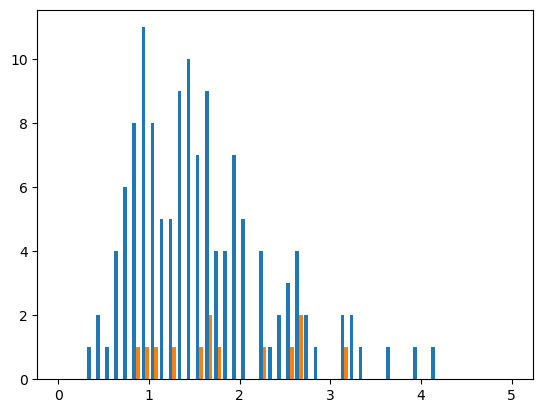

In [9]:
fig = plt.figure()
s = 5
ax = fig.add_subplot(111)
ax.hist(
    c.fields["amplitude"][c.status["activity"][:, s, 2], s, :, 0],
    bins=np.linspace(0.01, 5, 51),
)

N data: 2808


5it [00:00, 60.09it/s]

[       nan 0.05226994 0.03405087 0.03997115 0.07370866 0.06023412
 0.03702457 0.0349912  0.03533035 0.05235953 0.02483191 0.02513639
 0.05101153 0.05823933 0.09126756 0.07010229 0.11864201 0.12034761
 0.0867363  1.        ]


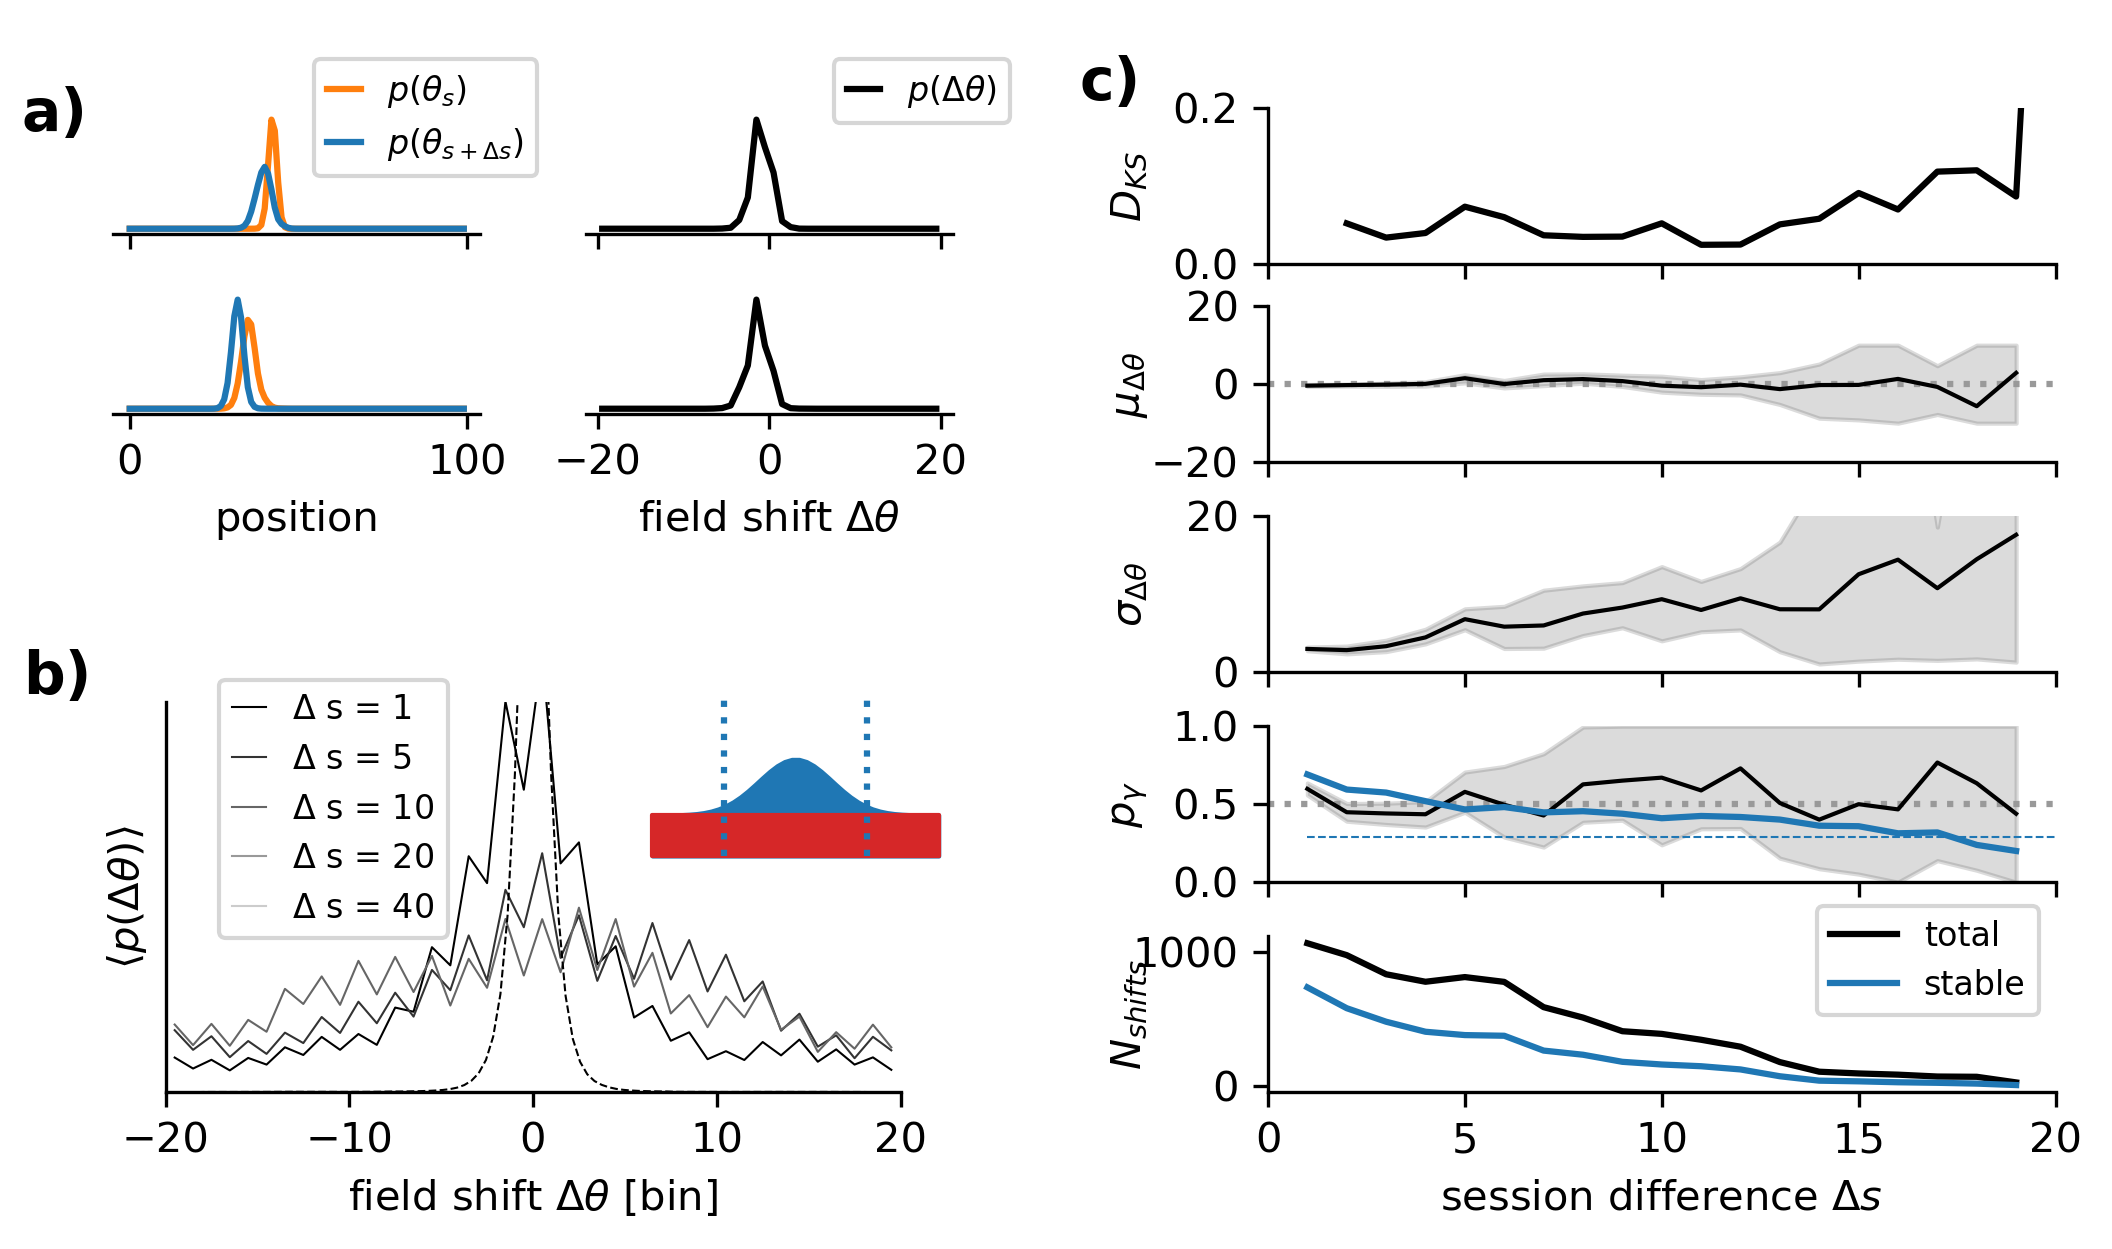

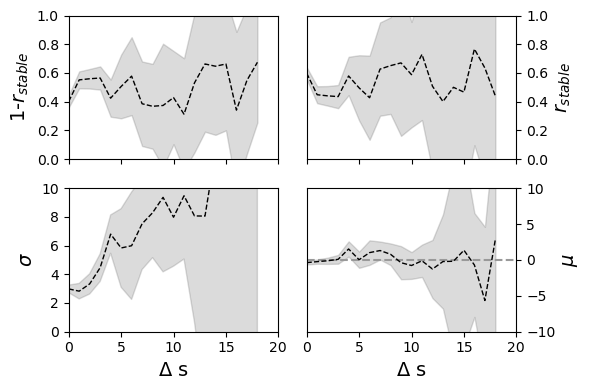

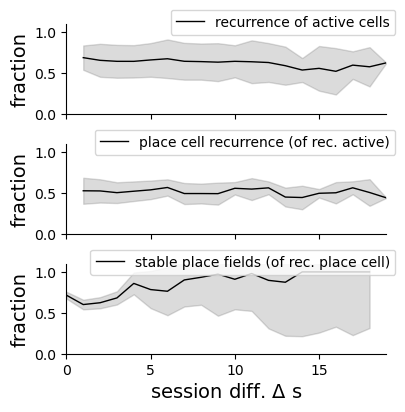

'\n\t[x] check calculation of shift\n\t[x] check if matching results and neuron identities match\n\t[x] check if maybe thresholding for rate gives better results?\n'

In [24]:
# c.setup_plots()
# c.plot_turnover_mechanism('act')
# c.plot_turnover_mechanism('PC')
# c.plot_matching_results()
# c.update_status(A_thr=1,A0_thr=0,reliability_thr=0.2,sigma_thr=.5,fr_thr=0.01,CI_thr=0)
# c.plot_recurrence()
# c.plot_stats()
# c.plot_PC_stats()
# c.plot_firingmaps()
c.plot_stability_dynamics()
# c.plot_param_dependent_stability(iterate_var=('fr_thr',np.linspace(0.0,0.1,6)))
# c.plot_network_dynamics()
# c.plot_coding_stats()
# c.plot_neuron_remapping()
# c.plot_neuron_examples()
# c.plot_pv_correlations()
# c.plot_example_draw()
# c.plot_corr_pairs()
# c.plot_sdep_stability()
# c.plot_alt_pf_detection()
# c.plot_multi_modes()
"""
	[x] check calculation of shift
	[x] check if matching results and neuron identities match
	[x] check if maybe thresholding for rate gives better results?
"""

In [20]:
# res = c.calculate_placefield_stability(dsMax=c.data['nSes'],n_processes=8,N_bs=100)
# c.stability['all']['mean']
c.stability = res

In [14]:
c.compare["shifts_distr"].shape
# c.update_status(fr_thr=0.1)
# c.compareSessions()
# c.stats.keys()

# from utils import load_data
# ld = load_data(c.paths['place_field_detection'][0])
# ld['fields']['parameter']['global']['A0'].shape

(8393, 40)

In [37]:
from placefield_dynamics.neuron_matching.neuron_matching_analysis import (
    neuron_matching_analysis,
)

m = neuron_matching_analysis(
    mousePath=c.path_mouse,
    paths=c.paths["neuron_detection"],
    matlab=False,
    suffix="redetected",
)

m.load_model()
m.dynamic_fit()
m.load_registration()
m.load_data()

"""
	TODO:
		[x] fix some plotting in matching
        [x] alignment['corr'] should have value "1" for first proper session, but currently has 0
        [ ] mutual information currently missing in cluster_analysis - readd to get_Stats        
"""

../../data/579ad/matching/match_model_redetected.pkl
found proper fit @times=0
../../data/579ad/matching/neuron_registration_redetected.pkl
../../data/579ad/matching/matching_data_redetected.pkl


'\n\tTODO:\n\t\t[ ] fix some plotting in matching\n        [ ] alignment[\'corr\'] should have value "1" for first proper session, but currently has 0\n        [ ] mutual information currently missing in cluster_analysis - readd to get_Stats\n        [ ] what to do about bins with \'steps\' in p_x?\n        \n'

uhm... appears to be broken: are footprint locations not corrected for shift?


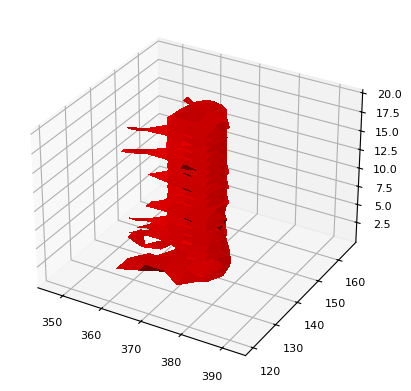

In [46]:
# m.plot_cluster_stats()
# m.plot_fit_results()
# m.plot_model()

# m.plot_alignment_statistics(s_compare=1)
# m.paths
m.plot_footprints(c=4)
# m.plot_matches(s=2,s_ref=1)